Read in data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [6]:
df = pd.read_csv("data/drawndata1.csv")
df.head(3)

,x,y,z
0,58.080365,225.699042,a
1,238.867357,247.456645,a
2,156.218212,286.588782,a


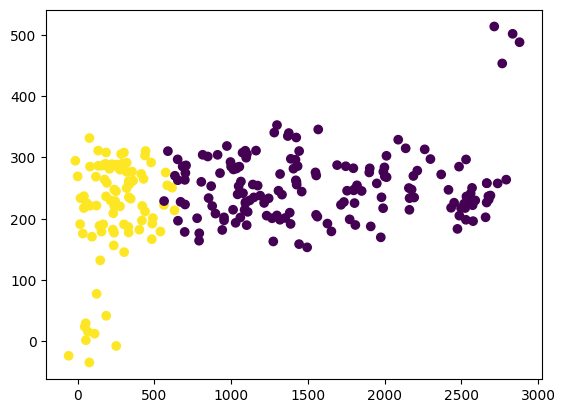

In [7]:
X = df[['x','y']].values
y = df['z'] =="a"
plt.scatter(X[:, 0], X[:, 1], c=y)

Notice the difference in scale of the x and y-axis and the two outliers on the bottom left and top right

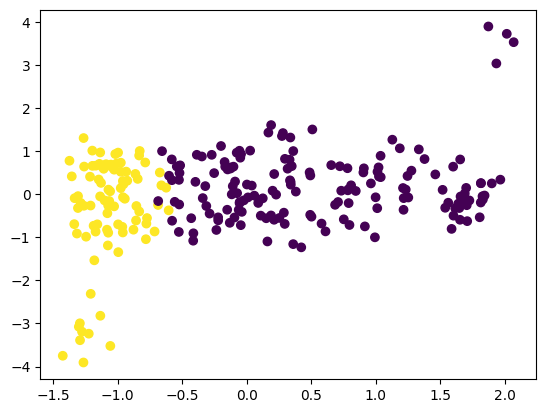

In [8]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer

X_new = StandardScaler().fit_transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1], c=y)


The axes look more similar, but the outliers are still there. Why is that? A standard scaler is transforming the data to Z values based on the mean and std

(array([118., 236., 146., 128.,  84.,  62.,  59.,  38.,  29.,  23.,  13.,
         14.,   7.,  15.,   9.,   6.,   4.,   1.,   1.,   1.,   1.,   0.,
          0.,   1.,   1.,   2.,   0.,   0.,   0.,   1.]),
 array([-1.09883115, -0.83493194, -0.57103272, -0.30713351, -0.04323429,
         0.22066492,  0.48456414,  0.74846335,  1.01236257,  1.27626178,
         1.540161  ,  1.80406021,  2.06795943,  2.33185864,  2.59575786,
         2.85965707,  3.12355629,  3.3874555 ,  3.65135472,  3.91525393,
         4.17915315,  4.44305236,  4.70695158,  4.97085079,  5.23475001,
         5.49864922,  5.76254844,  6.02644765,  6.29034687,  6.55424608,
         6.8181453 ]),
 <BarContainer object of 30 artists>)

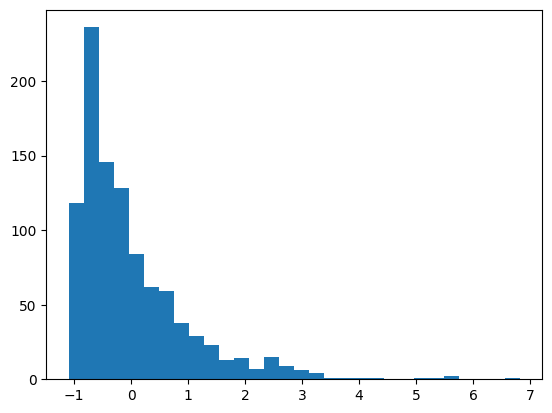

In [11]:
x = np.random.exponential(10, (1000)) + np.random.normal(0,1,(1000))
plt.hist( (x - np.mean(x)) / np.std(x), 30)

How can we normalize the outliers as well?

c:\Users\Amirah\Python_Projects\scikit-learn\.venv\Lib\site-packages\sklearn\preprocessing\_data.py:2785: UserWarning: n_quantiles (1000) is greater than the total number of samples (252). n_quantiles is set to n_samples.
  warnings.warn(


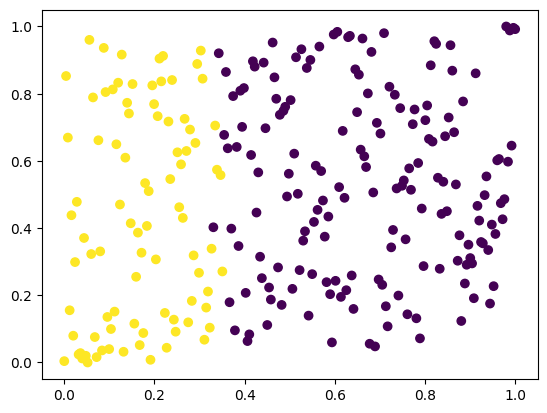

In [12]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer

X_new = QuantileTransformer().fit_transform(X)
plt.scatter(X_new[:, 0], X_new[:, 1], c=y)

Notice the axes scales are similar, and the clusters are still there but lesser in degree

Check the differences in output based on these two transformers, function to deal with plotting

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

def plot_output(scaler):
    pipe = Pipeline([
        ('scale', scaler),
        ('model', KNeighborsClassifier(n_neighbors=90, , weights='distance'))
    ])

    pred = pipe.fit(X, y).predict(X)

    plt.figure(figsize=(9,3))
    plt.subplot(131)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.title('Original Data')

    plt.subplot(132)
    X_tfm = scaler.transform(X)
    plt.scatter(X_tfm[:, 0], X_tfm[:, 1], c=y)
    plt.title('Transformed Data')

    plt.subplot(133)
    X_new = np.concatenate([
        np.random.uniform(0, X[:, 0].max(), (5000, 1)),
        np.random.uniform(0, X[:, 1].max(), (5000,1))
    ], axis=1)

    y_proba = pipe.predict_proba(X_new)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=y_proba[:, 1], alpha=0.7)
    plt.title("Predicted Data")

SyntaxError: invalid syntax (3231515050.py, line 7)

Effect of StandardScaler

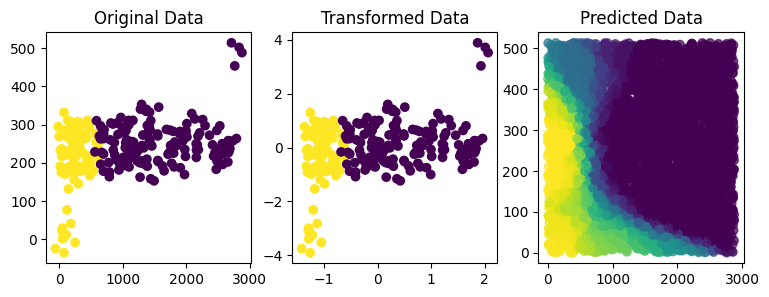

In [25]:
plot_output(scaler = StandardScaler())

Effect of QuantileScaler

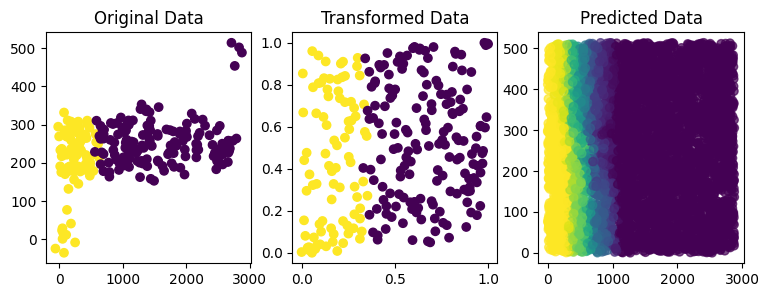

In [34]:
plot_output(scaler = QuantileTransformer(n_quantiles=100))

Use gridsearch with QuantileTransformer

In [32]:
from sklearn.model_selection import GridSearchCV
import pandas as pd

pipe = Pipeline([
        ('scale', QuantileTransformer()),
        ('model', KNeighborsClassifier(n_neighbors=20, weights='distance'))
    ])

mod = GridSearchCV(
    estimator=pipe,
    param_grid={
        'model__n_neighbors': [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
    },
    cv=5
)

mod.fit(X,y)
pd.DataFrame(mod.cv_results_)

c:\Users\Amirah\Python_Projects\scikit-learn\.venv\Lib\site-packages\sklearn\preprocessing\_data.py:2785: UserWarning: n_quantiles (1000) is greater than the total number of samples (201). n_quantiles is set to n_samples.
  warnings.warn(
c:\Users\Amirah\Python_Projects\scikit-learn\.venv\Lib\site-packages\sklearn\preprocessing\_data.py:2785: UserWarning: n_quantiles (1000) is greater than the total number of samples (201). n_quantiles is set to n_samples.
  warnings.warn(
c:\Users\Amirah\Python_Projects\scikit-learn\.venv\Lib\site-packages\sklearn\preprocessing\_data.py:2785: UserWarning: n_quantiles (1000) is greater than the total number of samples (202). n_quantiles is set to n_samples.
  warnings.warn(
c:\Users\Amirah\Python_Projects\scikit-learn\.venv\Lib\site-packages\sklearn\preprocessing\_data.py:2785: UserWarning: n_quantiles (1000) is greater than the total number of samples (202). n_quantiles is set to n_samples.
  warnings.warn(
c:\Users\Amirah\Python_Projects\scikit-learn

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008656,0.001815,0.006346,0.004111,5,{'model__n_neighbors': 5},0.647059,0.980392,1.00,0.98,1.00,0.921490,0.137501,20
1,0.009312,0.003379,0.004910,0.002519,10,{'model__n_neighbors': 10},0.725490,1.000000,0.98,1.00,0.98,0.937098,0.106181,8
2,0.005801,0.001353,0.003865,0.001260,15,{'model__n_neighbors': 15},0.666667,1.000000,1.00,0.98,0.98,0.925333,0.129642,18
3,0.006974,0.002699,0.006402,0.002337,20,{'model__n_neighbors': 20},0.725490,1.000000,1.00,0.96,0.98,0.933098,0.104858,13
4,0.004845,0.001973,0.003740,0.002075,25,{'model__n_neighbors': 25},0.686275,1.000000,1.00,0.96,0.98,0.925255,0.120407,19
5,0.005792,0.002093,0.004201,0.002008,30,{'model__n_neighbors': 30},0.745098,1.000000,1.00,0.96,0.98,0.937020,0.097100,9
6,0.007894,0.003488,0.005171,0.001694,35,{'model__n_neighbors': 35},0.745098,1.000000,1.00,0.96,0.98,0.937020,0.097100,9
7,0.008054,0.002851,0.008361,0.005306,40,{'model__n_neighbors': 40},0.745098,1.000000,0.98,0.96,0.98,0.933020,0.094808,16
8,0.004198,0.002509,0.004084,0.002375,45,{'model__n_neighbors': 45},0.725490,1.000000,1.00,0.96,0.98,0.933098,0.104858,13
9,0.003198,0.001027,0.002914,0.001266,50,{'model__n_neighbors': 50},0.725490,1.000000,1.00,0.96,0.98,0.933098,0.104858,13


Another dataset

(217, 2)

(217,)

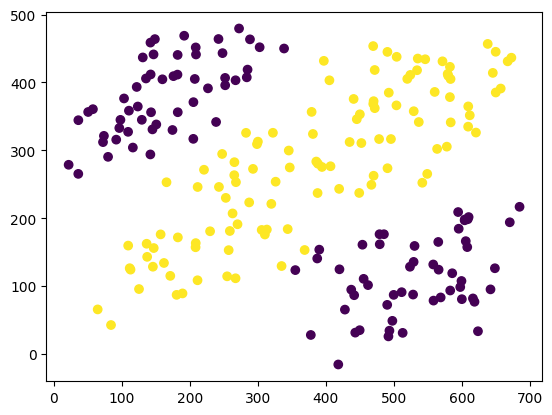

In [9]:
df = pd.read_csv('data/drawndata2.csv')
X = df[['x', 'y']].values
y = df['z'] == 'a'
display(X.shape)
display(y.shape)
plt.scatter(X[:, 0], X[:, 1], c=y)

Non-linearly separable

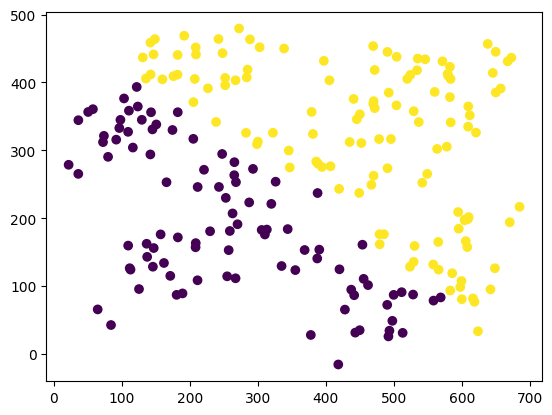

In [15]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('scale', QuantileTransformer(n_quantiles=100)),
    ('model', LogisticRegression())
])

pred = pipe.fit(X, y). predict(X)
plt.scatter(X[:, 0], X[:, 1], c=pred)

Not an accurate prediction. What if we preprocess using additional features i.e. X1X2, X1^2, X2^2 - the effect of a preprocessing step in the pipeline

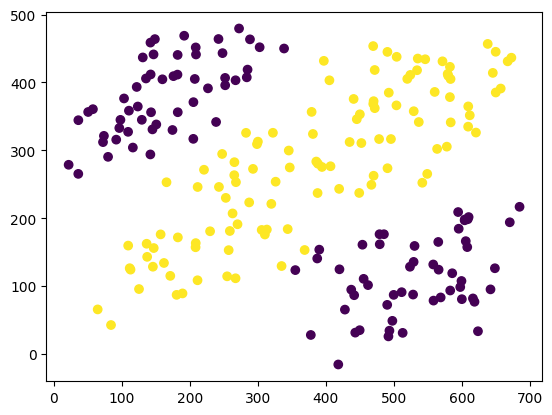

In [17]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('scale', PolynomialFeatures()),
    ('model', LogisticRegression())
])

pred = pipe.fit(X, y). predict(X)
plt.scatter(X[:, 0], X[:, 1], c=pred)

One Hot Encoding

In [18]:
arr = np.array(["low", "low", "high", "medium"]).reshape(-1, 1)
arr

array([['low'],
       ['low'],
       ['high'],
       ['medium']], dtype='<U6')

In [19]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
enc.fit_transform(arr)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4 stored elements and shape (4, 3)>

In [23]:
enc = OneHotEncoder(sparse_output=False)
enc.fit_transform(arr)

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

Use case, arr is the class to predict so the encoded array is the y

In [24]:
enc.transform([['zero']])

ValueError: Found unknown categories ['zero'] in column 0 during transform

Not allow to give the encoder data that it hasn't seen

In [28]:
# handle_unknown useful to generate X matrix, don't do this for y labels
enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
enc.fit_transform(arr)
enc.transform([['zero']])

array([[0., 0., 0.]])